### Importing Libraries

In [131]:
import gc #garbage collector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from helper import utility
import importlib
importlib.reload(utility)


<module 'helper.utility' from 'c:\\Users\\Lewkh\\OneDrive\\Documents\\GitHub\\CE4041_ML\\helper\\utility.py'>

### Importing Zillow Datasets

In [123]:
# Raw data set provided
prop_2016 = utility.load_data('data/properties_2016.csv')
prop_2017 = utility.load_data('data/properties_2017.csv')
train_2016 = utility.load_data('data/train_2016_v2.csv')
train_2017 = utility.load_data('data/train_2017.csv')

In [124]:
# Combining the prop dataset with its corresponding train datasets on their parcelid
# left join is used so that all properties without logerror will be ignored
training_2016 = utility.merge_data(train_2016, prop_2016, 'parcelid')
training_2017 = utility.merge_data(train_2017, prop_2017, 'parcelid')



# Data across the 2 years are combined into one data frame for processing at later stages
training_all = pd.concat([training_2016, training_2017] , ignore_index=True)
properties_all = pd.concat([prop_2016, prop_2017], ignore_index=True) 


training_all.shape
#properties_all.shape


(167888, 60)

In [125]:
# Check and Drop any duplicates in the training dataset
# Duplicates are those which have the same parcelid and transactiondate

training_all.shape
utility.check_duplicates(training_all)
training_all = utility.drop_dups(training_all)

There are 0 duplicate IDs for 167888 total entries


In [126]:
# We can see that there are no duplicates in the dataset so far
training_all.shape

(167888, 60)

### Looking at the Target Variable - logerror

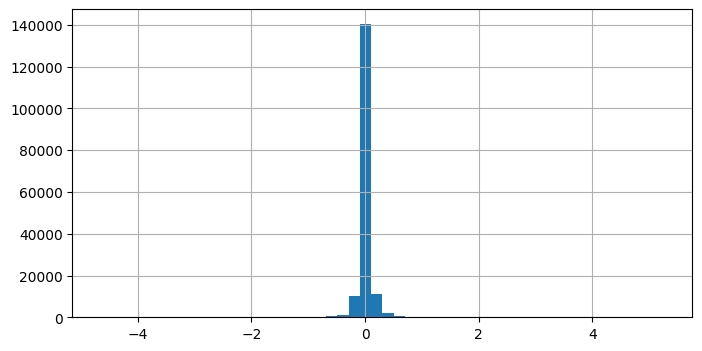

In [127]:
target_y = training_all['logerror']


target_y.hist(bins=50, figsize=(8,4))
plt.show()

In [128]:
target_y.describe()

count    167888.000000
mean          0.013906
std           0.165706
min          -4.655420
25%          -0.025300
50%           0.006000
75%           0.039200
max           5.262999
Name: logerror, dtype: float64

In [129]:
# Drop outliers that are more than 2.5 std away from mean
upper_threshold = target_y.mean() + (2.5*target_y.std())
lower_threshold = target_y.mean() - (2.5*target_y.std())


# Remove data that have their target y value as outliers
training_all = training_all[training_all['logerror'] < upper_threshold]
training_all = training_all[training_all['logerror'] > lower_threshold]
training_all.shape



(164566, 60)

In [130]:
# Remove the row if the amount of NaN missing values is more than 76%
REMOVAL_THRESHOLD = 75.0
min_count = int(((100-REMOVAL_THRESHOLD)/100)*training_all.shape[1] + 1)
training_all = training_all.dropna(axis=0, thresh=min_count)

training_all.shape

(164538, 60)

### Data Preprocessing